In [1]:
import sys
import numpy as np
import pandas as pd
import random

#sys.path.append('/home/olya/TUM/DESMOND/DESMOND2/')
from run_unpast import run

from utils.method import prepare_input_matrix, make_consensus_biclusters, write_bic_table, read_bic_table

### Input and output

In [2]:
exprs_file = "test_data_TCGA200/TCGA_200.exprs_z.tsv" # input .tsv file; features in rows, samples in columns
exprs = pd.read_csv(exprs_file,sep = "\t",index_col=0)
basename = 'TCGA200' # output prefix
out_dir = "test_results/" # output folder

### Running UnPaSt five times

* biclusters from individual runs:

\<basename>.seed=\<seed>.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv


In [3]:
n_runs = 5
seeds = []
cseed = 0
random.seed(cseed)
for i in range(n_runs):
    seeds.append(random.randint(0,1000000))
print("generate ",n_runs," seeds",seeds)

generate  5  seeds [885440, 403958, 794772, 933488, 441001]


In [4]:
biclusters = []
for seed in seeds:
    # find and save biclusters
    results = run(exprs_file, basename,
                          out_dir=out_dir,
                          save=True, load=False,
                          # optional: show distributions of listed features after binarization
                          # show_fits = ["SEZ6","SYP","ESR1","ERBB2","FOXA1","PTH2R"], 
                          seed = seed,
                          verbose = True)
    # make bicluster ids unique: 'seed=<seed>_<bicluster id>'
    results.index = ["seed="+str(seed)+"_"+str(x) for x in results.index.values ]
    biclusters.append(results)


Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5

Binarization started ....

		genes processed: 0
		genes processed: 1000
		genes processed: 2000
		genes processed: 3000
		genes processed: 4000
		genes processed: 5000
		genes processed: 6000
		genes processed: 7000
		genes processed: 8000
		genes processed: 9000
		genes processed: 10000
		genes processed: 11000
		genes processed: 12000
		genes processed: 13000
		genes processed: 14000
	Binarization for 14986 features completed in 39.80 s
	Generate background distribuition of SNR depending on the bicluster size ...
		total samples: 200,
		number of samples in a bicluster: 5 - 100,
		n_permutations: 10000
		snr pval threshold: 0.01
	Background ditribution generated in 1.01 s
		UP-regulated features:	849
		DOWN-regulated features:	360
Clustering features ...

		WGCNA pre-clustering: True
	Running WGCNA for t

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 16.41 s.
	modules: 87, not clustered features 313 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 117 features computed in 0.06 s.
No biclusters to merge
test_results/TCGA200.seed=885440.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 84.13 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5

Binarization started ....

		genes processed: 0
		genes processed: 1000
		genes processed: 2000
		genes processed: 3000
		genes processed: 4000
		genes processed: 5000
		genes processed: 6000
		genes processed: 7000
		genes processed: 8000
		genes processed: 9000
		genes processed: 10000
		genes processed: 11000
		genes processed: 12000
		genes processed: 13000
		genes processed: 14000
	Binarization for 14986 features completed in 35.27 s
	Generate background distribuition of SNR depending on the bicluster size ...
		total samples: 200,
		number of samples in a b

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 16.87 s.
	modules: 111, not clustered features 147 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 146 features computed in 0.15 s.
No biclusters to merge
test_results/TCGA200.seed=403958.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 75.09 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5

Binarization started ....

		genes processed: 0
		genes processed: 1000
		genes processed: 2000
		genes processed: 3000
		genes processed: 4000
		genes processed: 5000
		genes processed: 6000
		genes processed: 7000
		genes processed: 8000
		genes processed: 9000
		genes processed: 10000
		genes processed: 11000
		genes processed: 12000
		genes processed: 13000
		genes processed: 14000
	Binarization for 14986 features completed in 32.74 s
	Generate background distribuition of SNR depending on the bicluster size ...
		total samples: 200,
		number of samples in a b

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 13.74 s.
	modules: 114, not clustered features 136 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 135 features computed in 0.13 s.
No biclusters to merge
test_results/TCGA200.seed=794772.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 71.90 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5

Binarization started ....

		genes processed: 0
		genes processed: 1000
		genes processed: 2000
		genes processed: 3000
		genes processed: 4000
		genes processed: 5000
		genes processed: 6000
		genes processed: 7000
		genes processed: 8000
		genes processed: 9000
		genes processed: 10000
		genes processed: 11000
		genes processed: 12000
		genes processed: 13000
		genes processed: 14000
	Binarization for 14986 features completed in 31.86 s
	Generate background distribuition of SNR depending on the bicluster size ...
		total samples: 200,
		number of samples in a b

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 16.23 s.
	modules: 98, not clustered features 101 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 118 features computed in 0.06 s.
No biclusters to merge
test_results/TCGA200.seed=933488.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 70.56 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5

Binarization started ....

		genes processed: 0
		genes processed: 1000
		genes processed: 2000
		genes processed: 3000
		genes processed: 4000
		genes processed: 5000
		genes processed: 6000
		genes processed: 7000
		genes processed: 8000
		genes processed: 9000
		genes processed: 10000
		genes processed: 11000
		genes processed: 12000
		genes processed: 13000
		genes processed: 14000
	Binarization for 14986 features completed in 31.23 s
	Generate background distribuition of SNR depending on the bicluster size ...
		total samples: 200,
		number of samples in a b

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 15.60 s.
	modules: 91, not clustered features 103 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 124 features computed in 0.07 s.
No biclusters to merge
test_results/TCGA200.seed=441001.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 70.40 s


In [5]:
for i in range(len(biclusters)):
    print("seed=%s\tn_biclusters: %s"%(seeds[i], biclusters[i].shape[0]))

seed=885440	n_biclusters: 117
seed=403958	n_biclusters: 146
seed=794772	n_biclusters: 135
seed=933488	n_biclusters: 118
seed=441001	n_biclusters: 124


### Consensus biclusters from 5 runs

* consensus biclusters:

TCGA200.consensus_seed=0.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv


Standardized expressions will be limited to [-3,3]:


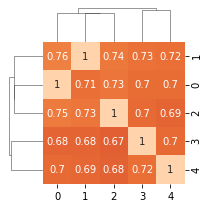

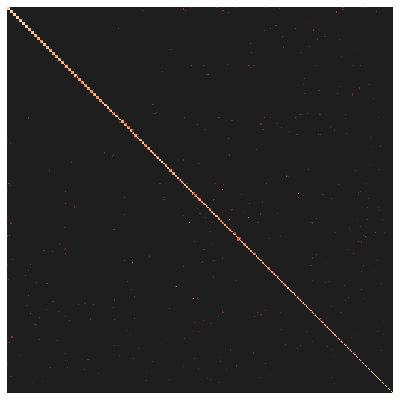

24 s for similarity matrix
	Running Louvain ...
		modularity: potts
	curve type: increasing


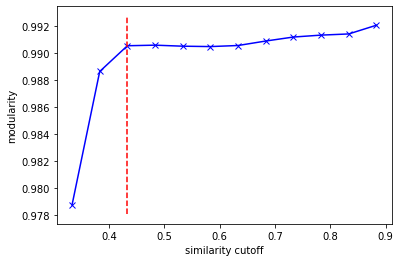

	Louvain runtime: modules detected in 0.50 s.
	modules: 141, not clustered features 74 
		similarity cutoff: 0.43 modularity: 0.991
keep genes included in at least 2 merged biclusters
all consensus biclusters: 220
detected 2+ times:136
4 s for making consensus biclusters from consensus gene sets


,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times,ids
0,2.922866,155,36,"{OCA2, SRSF12, XBP1, SH3GL3, CXCL5, INA, RIPPL...","{TCGA-A7-A26G-01, TCGA-C8-A134-01, TCGA-A1-A0S...","{OCA2, SRSF12, SH3GL3, CXCL5, INA, RIPPLY2, LC...","{FBP1, SLC44A4, CAPN13, XBP1, MLPH, TTC6, CYP4...","{9729, 12290, 3077, 1553, 11795, 2068, 6677, 1...","{128, 2, 131, 4, 7, 136, 139, 12, 13, 145, 19,...",BOTH,7,"{seed=403958_0, seed=794772_1, seed=933488_3, ..."
1,2.763514,2,14,"{LUC7L2, ISY1-RAB43}","{TCGA-AN-A0FT-01, TCGA-E9-A54Y-01, TCGA-AO-A1K...",{},"{LUC7L2, ISY1-RAB43}","{6282, 7263}","{193, 69, 70, 166, 168, 110, 19, 52, 179, 86, ...",DOWN,2,"{seed=933488_1, seed=885440_26}"
2,2.674523,7,24,"{IGSF23, EN1, DMRT1, NCAN, PAPL, TLX3, KRT9}","{TCGA-C8-A134-01, TCGA-D8-A147-01, TCGA-D8-A1X...","{IGSF23, EN1, DMRT1, NCAN, PAPL, TLX3, KRT9}",{},"{6080, 8261, 12997, 6792, 4019, 9012, 3546}","{131, 7, 139, 12, 13, 145, 19, 147, 157, 36, 1...",UP,7,"{seed=885440_23, seed=403958_12, seed=441001_6..."
3,2.472176,139,47,"{ZMYND10, TFF3, TNRC18P1, TBC1D9, MAPT, EFCAB1...","{TCGA-LD-A9QF-01, TCGA-A7-A26G-01, TCGA-C8-A13...",{},"{ZMYND10, TFF3, TNRC18P1, TBC1D9, MAPT, EFCAB1...","{3596, 1529, 5647, 13331, 20, 11795, 4117, 155...","{128, 2, 131, 4, 132, 134, 7, 135, 136, 139, 1...",DOWN,5,"{seed=794772_3, seed=441001_3, seed=933488_2, ..."
4,2.34625,2,19,"{PRR27, ODAM}","{TCGA-A7-A26G-01, TCGA-A7-A3IY-01, TCGA-A1-A0S...","{PRR27, ODAM}",{},"{8819, 9996}","{2, 4, 139, 19, 22, 24, 165, 166, 48, 183, 58,...",UP,3,"{seed=403958_5, seed=885440_15, seed=794772_5}"
...,...,...,...,...,...,...,...,...,...,...,...,...
131,1.380035,4,98,"{GSPT2, ARSH, WDR64, ZBED9}","{TCGA-A2-A0T2-01, TCGA-E9-A1RD-01, TCGA-E2-A10...",{},"{GSPT2, ARSH, WDR64, ZBED9}","{14392, 916, 5437, 14207}","{0, 3, 4, 7, 10, 13, 15, 17, 18, 19, 20, 21, 2...",DOWN,4,"{seed=403958_125, seed=885440_85, seed=441001_..."
132,1.366281,9,85,"{TDRD5, ZNF667, VANGL2, SULT4A1, LHFPL5, FAM21...","{TCGA-AN-A0FW-01, TCGA-LD-A9QF-01, TCGA-AN-A0X...",{},"{TDRD5, ZNF667, VANGL2, LHFPL5, GLB1L2, FAM218...","{14025, 12490, 5355, 12782, 10832, 14839, 4408...","{0, 3, 4, 5, 10, 17, 18, 21, 24, 26, 28, 29, 3...",DOWN,4,"{seed=403958_144, seed=885440_106, seed=441001..."
133,1.345161,2,47,"{SHISA9, SERTAD4}","{TCGA-A7-A26G-01, TCGA-A2-A4S0-01, TCGA-A7-A3I...",{},"{SERTAD4, SHISA9}","{11372, 11501}","{0, 128, 2, 3, 130, 5, 6, 7, 135, 136, 12, 144...",DOWN,2,"{seed=885440_107, seed=403958_141}"
134,1.319914,3,47,"{SPAG6, CHGB, CARTPT}","{TCGA-AN-A0XL-01, TCGA-A2-A4S0-01, TCGA-A7-A3I...","{SPAG6, CARTPT, CHGB}",{},"{1875, 2491, 12124}","{0, 1, 2, 5, 134, 9, 15, 144, 148, 21, 23, 24,...",UP,2,"{seed=794772_128, seed=403958_139}"


In [6]:
# filter and z-score transform input matrix, limit z-scores to [-3,3]
exprs_z = prepare_input_matrix(exprs, min_n_samples=5,ceiling=3)
consensus_biclusters = make_consensus_biclusters(biclusters, exprs_z, 
                                                      seed = cseed,
                                                      verbose = True,
                                                      plot = True)

consensus_biclusters

In [10]:
# save consensus biclusters
outfile = out_dir+basename+".consensus_seed="+str(cseed)+".bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv"
#write_bic_table(consensus_biclusters,outfile)
outfile

'test_results/TCGA200.consensus_seed=0.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv'

# Example biclusters 

In [11]:
g = "ERBB2"
b= consensus_biclusters
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times,ids
34,1.708024,15,20,"{PSMD3, ZP2, ADAM2, NEU4, STARD3, DMRTC2, TGM4...","{TCGA-LD-A9QF-01, TCGA-C8-A135-01, TCGA-B6-A0R...","{PSMD3, ZP2, ADAM2, NEU4, STARD3, TGM4, UGT2B1...",{},"{3552, 14946, 12074, 12875, 11338, 9294, 12367...","{129, 132, 134, 149, 28, 29, 39, 46, 47, 54, 6...",UP,5,"{seed=885440_14, seed=933488_14, seed=794772_1..."


In [12]:
g = "ESR1"
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times,ids
3,2.472176,139,47,"{ZMYND10, TFF3, TNRC18P1, TBC1D9, MAPT, EFCAB1...","{TCGA-LD-A9QF-01, TCGA-A7-A26G-01, TCGA-C8-A13...",{},"{ZMYND10, TFF3, TNRC18P1, TBC1D9, MAPT, EFCAB1...","{3596, 1529, 5647, 13331, 20, 11795, 4117, 155...","{128, 2, 131, 4, 132, 134, 7, 135, 136, 139, 1...",DOWN,5,"{seed=794772_3, seed=441001_3, seed=933488_2, ..."


In [13]:
g = "FOXA1"
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times,ids
0,2.922866,155,36,"{OCA2, SRSF12, XBP1, SH3GL3, CXCL5, INA, RIPPL...","{TCGA-A7-A26G-01, TCGA-C8-A134-01, TCGA-A1-A0S...","{OCA2, SRSF12, SH3GL3, CXCL5, INA, RIPPLY2, LC...","{FBP1, SLC44A4, CAPN13, XBP1, MLPH, TTC6, CYP4...","{9729, 12290, 3077, 1553, 11795, 2068, 6677, 1...","{128, 2, 131, 4, 7, 136, 139, 12, 13, 145, 19,...",BOTH,7,"{seed=403958_0, seed=794772_1, seed=933488_3, ..."
3,2.472176,139,47,"{ZMYND10, TFF3, TNRC18P1, TBC1D9, MAPT, EFCAB1...","{TCGA-LD-A9QF-01, TCGA-A7-A26G-01, TCGA-C8-A13...",{},"{ZMYND10, TFF3, TNRC18P1, TBC1D9, MAPT, EFCAB1...","{3596, 1529, 5647, 13331, 20, 11795, 4117, 155...","{128, 2, 131, 4, 132, 134, 7, 135, 136, 139, 1...",DOWN,5,"{seed=794772_3, seed=441001_3, seed=933488_2, ..."


In [14]:
g = "SEZ6"
b= consensus_biclusters
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times,ids
28,1.734242,10,17,"{SYT4, LRTM2, PCSK2, AMER3, CARTPT, SVOP, KCNH...","{TCGA-AR-A0U3-01, TCGA-C8-A1HK-01, TCGA-A2-A4S...","{SYT4, LRTM2, PCSK2, AMER3, SVOP, KCNH6, CPLX2...",{},"{11392, 2913, 12579, 6442, 12523, 1875, 9140, ...","{33, 98, 35, 162, 134, 103, 168, 77, 17, 177, ...",UP,5,"{seed=794772_73, seed=441001_12, seed=403958_8..."
29,1.732302,3,25,"{SEZ6, KCNH6, AMER3}","{TCGA-A2-A4S0-01, TCGA-D8-A1XU-01, TCGA-D8-A1Y...","{SEZ6, KCNH6, AMER3}",{},"{11392, 6442, 534}","{1, 130, 17, 20, 21, 150, 23, 151, 31, 33, 162...",UP,3,"{seed=885440_87, seed=403958_24, seed=794772_68}"


### Plot heatmap for selected biclusters
* Basal: 0,lightblue
* Her2+: 34,yellow
* Neuroendocrine: 28,orange

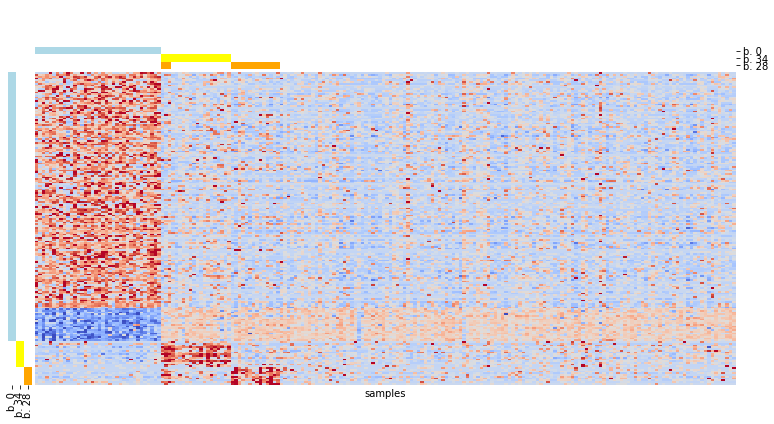

In [21]:
from utils.figs import draw_heatmap2
from utils.method import zscore
#  Basal: 0,lightblue; Her2+: 34,yellow; Neuroendocrine: 28,orange
i = [0,34,28] 
b = consensus_biclusters.loc[i,:]


tmp = draw_heatmap2(exprs_z ,b,
              bicluster_colors=["lightblue","yellow","orange"], # "auto",
              figsize = (12,6), 
              dendrogram_ratio=(0.1,0.1),
              colors_ratio=(0.02/12*6, 0.02),
              bic_prefix = "b. ",
              no_legend=True,no_cbar=True,
              col_labels = False,
              row_labels = False,
                no_row_colors = False,cluster_rows=False
             )